Project Overview

This project is a Python script written in a Jupyter Notebook format, aimed at analyzing environmental and soil chemical data to predict a specific status (e.g., Status column) using a machine learning model (Decision Tree). The dataset includes variables such as soil moisture, temperature, air humidity, soil pH, nutrients (nitrogen, phosphorus, potassium), and a target status. It likely serves a purpose in smart agriculture, such as determining irrigation needs or optimal plant growth conditions.

The project is divided into several key steps, each of which I will explain in detail below, followed by separate code blocks.

1. Loading and Inspecting the Data
Explanation:

In this step, the dataset is loaded from a CSV file named TARP.csv, and an initial inspection is performed to understand its structure and content. This is done using the pandas library. The goal is to become familiar with the data, identify columns, data types, missing values, and descriptive statistics.

    Data Columns:
        Environmental variables: Soil Moisture (soil moisture level), Temperature (temperature), Air humidity (%) (air humidity), Wind speed (Km/h) (wind speed), Pressure (KPa) (pressure), rainfall (rainfall amount).
        Soil chemical variables: ph (soil acidity), N (nitrogen), P (phosphorus), K (potassium).
        Time variable: Time.
        Target variable: Status (status, e.g., ON or OFF for an irrigation system).
    Initial Observations:
        The dataset contains 100,000 rows and 15 columns.
        The Status column is the target variable, likely representing a binary classification problem (0 and 1).
        Some columns, such as ph and Air temperature (C), have a significant number of missing values (97,800 and 76,005 missing values, respectively).

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('TARP.csv')

# Display the first five rows
print("First five rows of the dataset:")
print(df.head())

# Check the shape of the dataset
print("\nDataset shape:", df.shape)

# Check data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Display descriptive statistics
print("\nDescriptive statistics of the dataset:")
print(df.describe())

# Check for missing values
print("\nNumber of missing values per column:")
print(df.isnull().sum())

First five rows of the dataset:
   Soil Moisture  Temperature   Soil Humidity  Time  Air temperature (C)  \
0             54           22              70    21                19.52   
1             12           20              40   104                19.49   
2             34           26              35    62                19.47   
3              7           44              44    93                19.54   
4             50           38              23    92                19.61   

   Wind speed (Km/h)  Air humidity (%)  Wind gust (Km/h)  Pressure (KPa)  \
0               2.13             55.04              6.30          101.50   
1               2.01             55.17             10.46          101.50   
2               1.90             55.30             14.63          101.51   
3               2.28             54.20             16.08          101.51   
4               2.66             53.09             17.52          101.51   

         ph    rainfall     N     P     K Status  
0  

2. Initial Data Analysis
Explanation:

This section focuses on an initial analysis of the data to gain a better understanding of its distribution, identify issues, and highlight key features.

    Dataset Size: 100,000 rows and 15 columns.
    Data Issues:
        There are substantial missing values in columns like ph, N, P, K, and rainfall (97,800 out of 100,000 rows). This means only 2,200 rows have complete data, which could complicate modeling.
        Solutions include filling missing values with mean/median, dropping columns with insufficient data, or using models robust to missing data.
    Data Distribution Analysis: Plotting histograms and box plots helps visualize the distribution of variables and detect outliers. A correlation heatmap is also useful to identify relationships between variables.

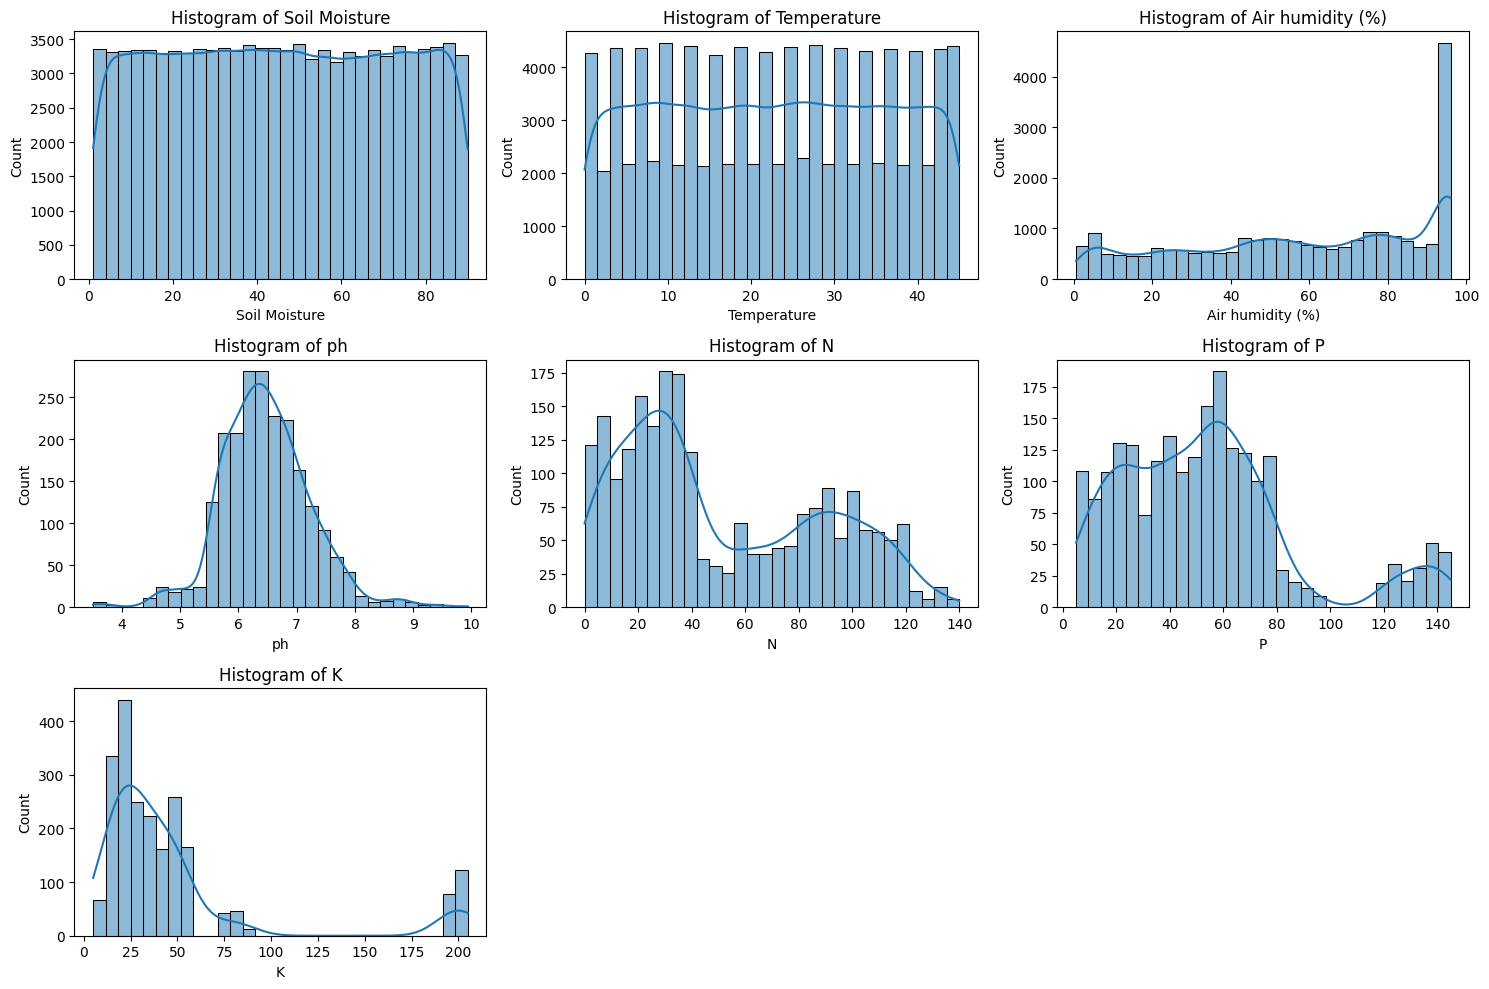

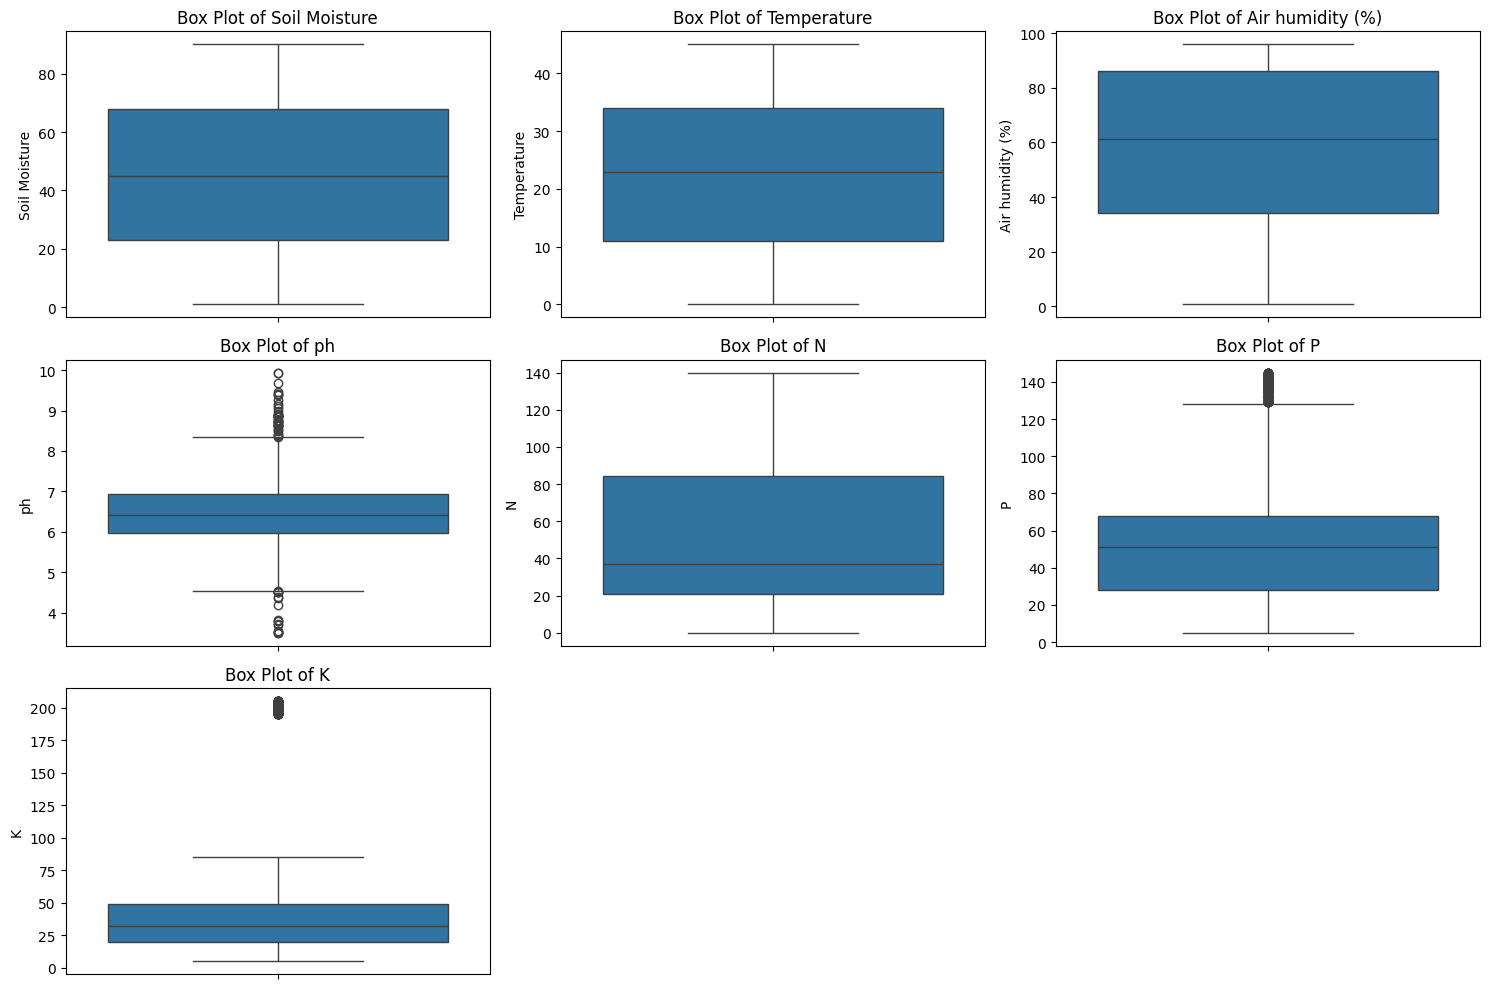

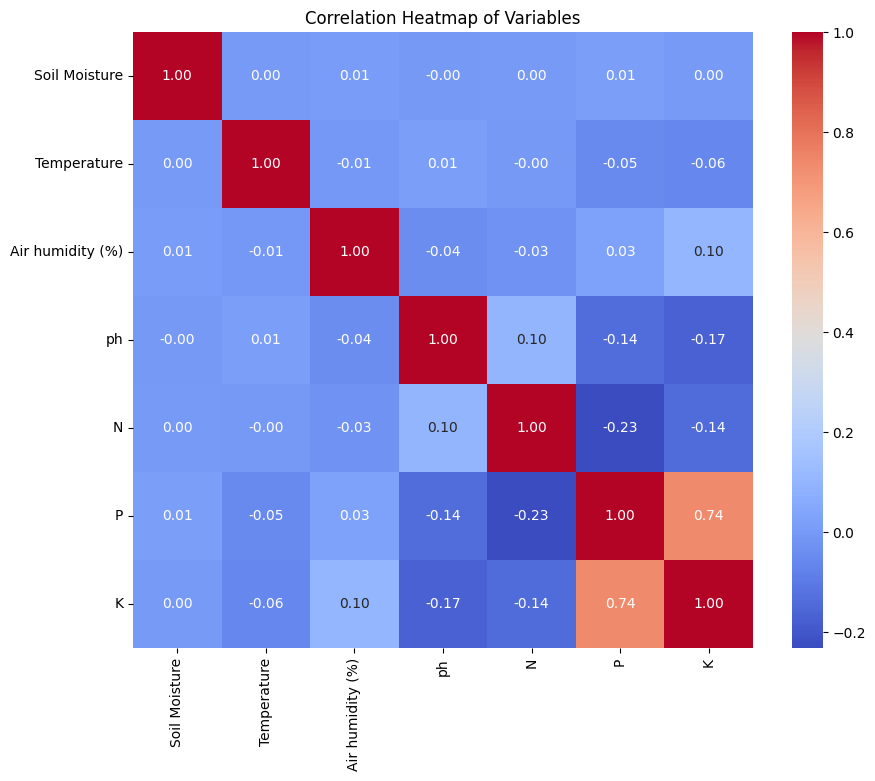

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset (ensure the file path is correct)
df = pd.read_csv('TARP.csv')

# Define numerical columns to analyze
numerical_cols = ['Soil Moisture', 'Temperature', 'Air humidity (%)', 'ph', 'N', 'P', 'K']

# Histograms for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)  # Drop NaN values to avoid errors
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

# Box plots to check for outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col].dropna())  # Drop NaN values to avoid errors
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Variables')
plt.show()

Plot Explanations:

    Histograms: These show the distribution of each variable. For example, if Soil Moisture is uniformly distributed, it might indicate varied environmental conditions.
    Box Plots: These identify outliers. Unusual values in Temperature, for instance, might need removal or correction.
    Correlation Heatmap: This reveals relationships between variables. A high correlation between Soil Moisture and Status would suggest its importance in predictions.

3. Evaluating the Optimized Model
Explanation:

In this step, an optimized Decision Tree model (tuned via Grid Search) is evaluated on the test data. The modeling process includes:

    Data Splitting: The dataset is split into training (X_train, y_train) and testing (X_test, y_test) sets.
    Optimization: Grid Search is used to find the best hyperparameters (e.g., tree depth or minimum samples per node).
    Evaluation: Metrics such as Accuracy, Confusion Matrix, and Classification Report are used to assess model performance.

Best parameters: {'max_depth': 3, 'min_samples_split': 2}

Model Accuracy: 0.675

Confusion Matrix:
 [[151  53]
 [ 90 146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.74      0.68       204
           1       0.73      0.62      0.67       236

    accuracy                           0.68       440
   macro avg       0.68      0.68      0.67       440
weighted avg       0.68      0.68      0.67       440



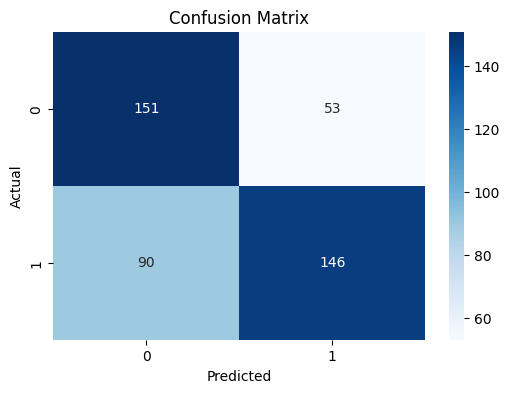

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

# Assuming data is ready and columns with missing values are dropped
X = df.drop(columns=['Status', 'Time']).dropna()
y = df.loc[X.index, 'Status'].map({'ON': 1, 'OFF': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and perform Grid Search
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_tree = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)

# Predict and evaluate
y_pred = best_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nModel Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Output Explanation:

    Model Accuracy: Indicates the percentage of correct predictions.
    Confusion Matrix: Shows the count of correct and incorrect predictions for each class (0 and 1).
    Classification Report: Includes Precision, Recall, and F1-Score, providing a detailed performance breakdown.

4. Saving the Model
Explanation:

The optimized model is saved for future use, allowing it to be reused without retraining. This is achieved using the joblib library.

In [5]:
import joblib

# Save the model
joblib.dump(best_tree, 'optimized_decision_tree_model.pkl')
print("Model saved successfully.")

Model saved successfully.
